In [1]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pickle as pk
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc,calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
fold = os.getcwd()

## Fig 1

In [2]:
file = open(fold + "/data_aux/feature_a1.pkl","rb")
data = pk.load(file)
file.close()
d2_d = data["d2_d"]
d3_p = data["d3_p"]

d2_d_lab =pd.read_csv("d2_d_lab.csv",sep="\t")
d2_d_lab = dict(zip(d2_d_lab['var'],d2_d_lab['Short name']))
d3_p_lab =pd.read_csv("d3_p_lab.csv",sep="\t")
d3_p_lab = dict(zip(d3_p_lab['var'],d3_p_lab['Short name']))

for k in d2_d_lab.keys():
    d2_d.loc[d2_d["var"]==k,"var"] = d2_d_lab[k]
for k in d3_p_lab.keys():
    d3_p.loc[d3_p["var"]==k,"var"] = d3_p_lab[k]
d2_d = d2_d.loc[d2_d.pvalue<=0.05]
d2_d.loc[d2_d.index,"cib"] = d2_d.ci2 -d2_d["or"]
d2_d.loc[d2_d.index,"cia"] = d2_d["or"] - d2_d.ci1
d2_d = d2_d.sort_values(by="mu",ascending=False).copy()
d3_p = d3_p.loc[d3_p.pvalue<=0.05]
d3_p.loc[d3_p.index,"cib"] = d3_p.ci2 -d3_p["or"]
d3_p.loc[d3_p.index,"cia"] = d3_p["or"] - d3_p.ci1
d3_p = d3_p.sort_values(by="mu",ascending=False).copy()
#10 best
#10 best
d2_d = d2_d.iloc[0:10,:]
d2_d = d2_d.sort_values(by="or",ascending=True).copy()
d3_p = d3_p.iloc[0:10,:]
d3_p = d3_p.sort_values(by="or",ascending=True).copy()

f = go.FigureWidget(make_subplots(rows=2,cols=1,subplot_titles=["A","B"],vertical_spacing=0.05))
f.add_trace(go.Scatter(x=d2_d["or"], y=d2_d["var"],error_x=dict(
            type='data',
            symmetric=False,
            array=d2_d.cib,
            arrayminus=d2_d.cia),mode='markers'),row=1,col=1)
f.update_traces(marker=dict(color="black", size=6),selector=dict(type='scatter'))
f.layout.xaxis.type="log"
f.update_xaxes(range=[-1,1.3],title="Odds ration",row=1,col=1)
f.update_yaxes(range=[-0.5, 9.5],title="",row=1,col=1)
f.layout.yaxis.domain = (0.6,1)

f.add_trace(go.Scatter(x=d3_p["or"], y=d3_p["var"],error_x=dict(
            type='data',
            symmetric=False,
            array=d3_p.cib,
            arrayminus=d3_p.cia),mode='markers'),row=2,col=1)
f.update_traces(marker=dict(color="black", size=6),selector=dict(type='scatter'))
f.layout.xaxis2.type="log"
f.update_xaxes(range=[-1.5,1.6],title="Odds ration",row=2,col=1)
f.update_yaxes(range=[-0.5, 9.5],title="",row=2,col=1)
#f.layout.yaxis2.domain = (0.6,1)

f.update_layout(height=800,width = 1000,showlegend=False,font_size=12,font_family="Arial",plot_bgcolor="white",
    xaxis=dict(linecolor="black"),xaxis2=dict(linecolor="black"),
    yaxis=dict(linecolor="black"),yaxis2=dict(linecolor="black"))
f.add_vline(x=1,line_dash="dash",line_color = "black",opacity=1,row=1,col=1)
f.add_vline(x=1,line_dash="dash",line_color = "black",opacity=1,row=2,col=1)
f.update_xaxes(ticks="outside")
f.update_yaxes(ticks="outside")

f.layout["annotations"][0].x=-0.4
f.layout["annotations"][1].x=-0.4
f.layout["annotations"][0].y=1.01
f.layout["annotations"][1].y=0.5
f.update_layout(xaxis={"tickmode": "array","tickvals": pd.to_numeric([f"{n:.1g}" for n in np.geomspace(0.01, 12, 15)])})
f.update_layout(xaxis2={"tickmode": "array","tickvals": pd.to_numeric([f"{n:.1g}" for n in np.geomspace(0.01, 15, 10)])})
#f.write_image("fig1.svg")
f

C:\Users\rafae\AppData\Local\Temp\ipykernel_18820\705023574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_d.loc[d2_d.index,"cib"] = d2_d.ci2 -d2_d["or"]
C:\Users\rafae\AppData\Local\Temp\ipykernel_18820\705023574.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_d.loc[d2_d.index,"cia"] = d2_d["or"] - d2_d.ci1
C:\Users\rafae\AppData\Local\Temp\ipykernel_18820\705023574.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

FigureWidget({
    'data': [{'error_x': {'array': array([ 0.54973018,  0.44724618,  0.51706428,  2.53968202,  2.48960591,
                                           2.71108199,  3.40288882,  5.87866487, 10.97859664, 10.81060984]),
                          'arrayminus': array([0.22562748, 0.21261631, 0.23187106, 1.25166478, 1.24846582, 1.34538098,
                                               1.50964694, 2.10482277, 2.88260254, 3.23716126]),
                          'symmetric': False,
                          'type': 'data'},
              'marker': {'color': 'black', 'size': 6},
              'mode': 'markers',
              'type': 'scatter',
              'uid': '27b9d23e-a631-4212-a056-44c33d500ff5',
              'x': array([0.3827004 , 0.40528441, 0.42038954, 2.46800309, 2.50430061, 2.67074426,
                          2.71342018, 3.27876667, 3.90896166, 4.62083911]),
              'xaxis': 'x',
              'y': array(['MFI BAFF-R in BAFF-R+ DN1 B Cells',
                 

## Fig 3

In [3]:
def d_euclidian(df,ydf):
    tam = len(df.columns)
    mh = np.ones(tam)
    md = np.ones(tam)
    mn = np.ones(tam)
    hdf =df.loc[ydf =="h"]
    ndf =df.loc[ydf =="n"]
    ddf =df.loc[ydf =="d"]
    for i in range(tam):
        mh[i] = np.mean(hdf.iloc[:,i])
        mn[i] = np.mean(ndf.iloc[:,i]) 
        md[i] = np.mean(ddf.iloc[:,i]) 
    dhn = np.linalg.norm(mh-mn)
    dhd = np.linalg.norm(mh-md)
    dnd = np.linalg.norm(mn-md)
    return dhn,dhd,dnd

def Calinski_Harabasz(df,ydf):
    dhn = calinski_harabasz_score(df[ydf!="d"],ydf[ydf!="d"])
    dhd = calinski_harabasz_score(df[ydf!="n"],ydf[ydf!="n"])
    dnd = calinski_harabasz_score(df[ydf!="h"],ydf[ydf!="h"])
    return dhn,dhd,dnd

def newton(df,ydf,xi,yi,num_itera,f_dist):
    dhn,dhd,dnd = f_dist(df,ydf)
    def fxy(x,y):
        return np.array([x**2 + y**2 - dhd**2, x**2 + dhn**2 - 2*dhn*y + y**2 - dnd**2])
    def jxy(x,y):
        return np.array([[2*x,2*y],[2*x,2*y - 2*dhn]])
    x = xi
    y= yi
    for i in range(num_itera):
        p = np.linalg.solve(jxy(x,y), -fxy(x,y))
        x = x+p[0]
        y = y+p[1]
        print(str(x)+" "+str(y))
    return x,y,dhn,dhd,dnd

def figure_d2_traces(x,y,dhn,dhd,dnd,leg=False):
    data = go.Line(x=[0,0,x,0],
                      y=[0,dhn,y,0],
                      mode='lines',
                      line=dict(width=1, dash='dash', color="gray"),
                      name='citations',legendgroup='5',showlegend=False)
    dist = go.Scatter(x=[0,x/2,x/2],
                      y=[dhn/2,y/2,(y-dhn)/2+dhn],
                      text=["{:.2f}".format(dhn),"{:.2f}".format(dhd),"{:.2f}".format(dnd)],
                      textposition='top right',
                      mode='text',legendgroup='5',showlegend=False)
    Hfig = go.Scatter(x=[0],y=[0],mode="markers",
                      marker=dict(color="#7f7f7f",symbol="cross",size=12), 
                      #text=["Healthy"],
                      #textposition='middle right',
                      #textfont=dict(color='#7f7f7f'),
                      name = "Healthy",legendgroup='1',showlegend=leg
    )
    Nfig = go.Scatter(x=[0],y=[dhn],mode="markers",
                      marker=dict(color="#ff7f0e",symbol="star",size=12), 
                      #text=["Dose 2 non-responders"],
                      #textposition='middle left',
                      #textfont=dict(color='#ff7f0e'),
                      name = "Dose 2 non-responders",legendgroup='1',showlegend=leg
    )
    Dfig = go.Scatter(x=[x],y=[y],mode="markers",
                      marker=dict(color="#1f77b4",size=12), 
                      #text=["Dose 2 detectable"],
                      #textposition='middle right',
                      #textfont=dict(color='#1f77b4'),
                      name = "Dose 2 detectable",legendgroup='1',showlegend=leg
    )
    return data,dist,Nfig,Hfig,Dfig

def figure_d3_traces(x,y,dhn,dhd,dnd,leg=False):
    data = go.Line(x=[0,0,x,0],
                      y=[0,dhn,y,0],
                      mode='lines',
                      line=dict(width=1, dash='dash', color="gray"),
                      name='citations',legendgroup='5',showlegend=False)
    dist = go.Scatter(x=[0,x/2,x/2],
                      y=[dhn/2,y/2,(y-dhn)/2+dhn],
                      text=["{:.2f}".format(dhn),"{:.2f}".format(dhd),"{:.2f}".format(dnd)],
                      textposition='top right',
                      mode='text',legendgroup='5',showlegend=False)
    Hfig = go.Scatter(x=[0],y=[0],mode="markers",
                      marker=dict(color="#7f7f7f",symbol="cross",size=12), 
                      #text=["Healthy"],
                      #textposition='middle right',
                      #textfont=dict(color='#7f7f7f'),
                      name = "Healthy",legendgroup='2',showlegend=leg
    )
    Nfig = go.Scatter(x=[0],y=[dhn],mode="markers",
                      marker=dict(color="#ffaa00",symbol="star",size=12), 
                      #text=["Dose 2 non-responders"],
                      #textposition='middle left',
                      #textfont=dict(color='#ff7f0e'),
                      name = "Dose 3 non-positives",legendgroup='2',showlegend=leg
    )
    Dfig = go.Scatter(x=[x],y=[y],mode="markers",
                      marker=dict(color="#2ca02c",size=12), 
                      #text=["Dose 2 detectable"],
                      #textposition='middle right',
                      #textfont=dict(color='#1f77b4'),
                      name = "Dose 3 positives",legendgroup='2',showlegend=leg
    )
    return data,dist,Nfig,Hfig,Dfig

In [4]:
file = open(fold + "/data_aux/immune_clean_a2.pkl","rb")
data = pk.load(file)
file.close()
data.keys()
all_x_d2_d = data["x_d2_d"]
all_x_d3_p = data["x_d3_p"]

y_d2_d = data["y_d2_d"]
y_d3_p = data["y_d3_p"]

file = open(fold + "/data_aux/feature_a1.pkl","rb")
data = pk.load(file)
file.close()

d2_d = data["d2_d"]
d3_p = data["d3_p"]
d2_d = d2_d.loc[d2_d["pvalue"]<=0.05,:]
d3_p = d3_p.loc[d3_p["pvalue"]<=0.05,:]

d2_d.sort_values(by="mu",ascending=False,inplace=True)
d2_d = d2_d.iloc[0:10,:]
d3_p.sort_values(by="mu",ascending=False,inplace=True)
d3_p = d3_p.iloc[0:10,:]

#f_d2_d = list(d2_d["var"])
#f_d3_p = list(d3_p["var"])

x_d2_d = all_x_d2_d.loc[:,list(d2_d["var"])].copy()
x_d3_p = all_x_d3_p.loc[:,list(d3_p["var"])].copy()


np.random.seed(42)
re = umap.UMAP(n_neighbors=6,min_dist=0.8)
re.fit(all_x_d2_d)
trans = re.transform(all_x_d2_d)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d2_d)})

np.random.seed(42)
re.fit(x_d2_d)
trans = re.transform(x_d2_d)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df3 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d2_d)})

np.random.seed(42)
re.fit(all_x_d3_p)
trans = re.transform(all_x_d3_p)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df7 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_p)})

np.random.seed(42)
re.fit(x_d3_p)
trans = re.transform(x_d3_p)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df9 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_p)})

#figure
f = go.FigureWidget(make_subplots(rows=2,cols=4,subplot_titles=["All Dose 2","","Best 10 Dose 2","","All Dose 3","","Best 10 Dose 3",""],vertical_spacing=0.10,horizontal_spacing=0,column_widths=[0.35,0.15,0.35,0.15]))
f.add_trace(go.Scatter(x=df.loc[df.y=="h","x1"],y=df.loc[df.y=="h","x2"],mode='markers',marker=dict(color="#7f7f7f",symbol="cross"),name = "Healthy",legendgroup='5',showlegend=False),row=1,col=1)
f.add_trace(go.Scatter(x=df.loc[df.y=="n","x1"],y=df.loc[df.y=="n","x2"],mode='markers',marker=dict(color="#ff7f0e",symbol="star"),name = "Dose 2 non-responders",legendgroup='5',showlegend=False),row=1,col=1)
f.add_trace(go.Scatter(x=df.loc[df.y=="d","x1"],y=df.loc[df.y=="d","x2"],mode='markers',marker=dict(color="#1f77b4"),name = "Dose 2 detectable",legendgroup='5',showlegend=False),row=1,col=1)
del df

x,y,dhn,dhd,dnd = newton(all_x_d2_d,y_d2_d,1,2,10,d_euclidian)
data,dist,Nfig,Hfig,Dfig=figure_d2_traces(x,y,dhn,dhd,dnd,True)
f.add_trace(data,row=1,col=2)
f.add_trace(dist,row=1,col=2)
f.add_trace(Nfig,row=1,col=2)
f.add_trace(Hfig,row=1,col=2)
f.add_trace(Dfig,row=1,col=2)
f.update_yaxes(scaleanchor = "x2",scaleratio = 1,showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=1,col=2)
f.update_xaxes(showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=1,col=2)

f.add_trace(go.Scatter(x=df3.loc[df3.y=="h","x1"],y=df3.loc[df3.y=="h","x2"],mode='markers',marker=dict(color="#7f7f7f",symbol="cross"),name = "Healthy",legendgroup='5',showlegend=False),row=1,col=3)
f.add_trace(go.Scatter(x=df3.loc[df3.y=="n","x1"],y=df3.loc[df3.y=="n","x2"],mode='markers',marker=dict(color="#ff7f0e",symbol="star"),name = "Dose 2 non-responders",legendgroup='5',showlegend=False),row=1,col=3)
f.add_trace(go.Scatter(x=df3.loc[df3.y=="d","x1"],y=df3.loc[df3.y=="d","x2"],mode='markers',marker=dict(color="#1f77b4"),name = "Dose 2 detectable",legendgroup='5',showlegend=False),row=1,col=3)
del df3

x,y,dhn,dhd,dnd = newton(x_d2_d,y_d2_d,1,2,10,d_euclidian)
data,dist,Nfig,Hfig,Dfig=figure_d2_traces(x,y,dhn,dhd,dnd)
f.add_trace(data,row=1,col=4)
f.add_trace(dist,row=1,col=4)
f.add_trace(Nfig,row=1,col=4)
f.add_trace(Hfig,row=1,col=4)
f.add_trace(Dfig,row=1,col=4)
f.update_yaxes(scaleanchor = "x4",scaleratio = 1,showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=1,col=4)
f.update_xaxes(showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=1,col=4)

f.add_trace(go.Scatter(x=df7.loc[df7.y=="h","x1"],y=df7.loc[df7.y=="h","x2"],mode='markers',marker=dict(color="#7f7f7f",symbol="cross"),name = "Healthy",legendgroup='5',showlegend=False),row=2,col=1)
f.add_trace(go.Scatter(x=df7.loc[df7.y=="n","x1"],y=df7.loc[df7.y=="n","x2"],mode='markers',marker=dict(color="#ffaa00",symbol="star"),name = "Dose 3 non-positives",legendgroup='5',showlegend=False),row=2,col=1)
f.add_trace(go.Scatter(x=df7.loc[df7.y=="d","x1"],y=df7.loc[df7.y=="d","x2"],mode='markers',marker=dict(color="#2ca02c"),name = "Dose 3 positives",legendgroup='5',showlegend=False),row=2,col=1)

del df7
x,y,dhn,dhd,dnd = newton(all_x_d3_p,y_d3_p,1,2,10,d_euclidian)
data,dist,Nfig,Hfig,Dfig=figure_d3_traces(x,y,dhn,dhd,dnd,True)
f.add_trace(data,row=2,col=2)
f.add_trace(dist,row=2,col=2)
f.add_trace(Nfig,row=2,col=2)
f.add_trace(Hfig,row=2,col=2)
f.add_trace(Dfig,row=2,col=2)
f.update_yaxes(scaleanchor = "x6",scaleratio = 1,showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=2,col=2)
f.update_xaxes(showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=2,col=2)

f.add_trace(go.Scatter(x=df9.loc[df9.y=="h","x1"],y=df9.loc[df9.y=="h","x2"],mode='markers',marker=dict(color="#7f7f7f",symbol="cross"),name = "Healthy",legendgroup='5',showlegend=False),row=2,col=3)
f.add_trace(go.Scatter(x=df9.loc[df9.y=="n","x1"],y=df9.loc[df9.y=="n","x2"],mode='markers',marker=dict(color="#ffaa00",symbol="star"),name = "Dose 3 non-positives",legendgroup='5',showlegend=False),row=2,col=3)
f.add_trace(go.Scatter(x=df9.loc[df9.y=="d","x1"],y=df9.loc[df9.y=="d","x2"],mode='markers',marker=dict(color="#2ca02c"),name = "Dose 3 positives",legendgroup='5',showlegend=False),row=2,col=3)
f.update_layout(legend_tracegroupgap=180)

x,y,dhn,dhd,dnd = newton(x_d3_p,y_d3_p,1,2,10,d_euclidian)
data,dist,Nfig,Hfig,Dfig=figure_d3_traces(x,y,dhn,dhd,dnd)
f.add_trace(data,row=2,col=4)
f.add_trace(dist,row=2,col=4)
f.add_trace(Nfig,row=2,col=4)
f.add_trace(Hfig,row=2,col=4)
f.add_trace(Dfig,row=2,col=4)

f.update_layout(height = 600,width=1000,template= "plotly_white",showlegend=True)
f.update_xaxes(showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False)
f.update_yaxes(showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False)

f.update_yaxes(scaleanchor = "x8",scaleratio = 1,showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=2,col=4)
f.update_xaxes(showticklabels=False,showline=False,ticks="",showgrid=False,zeroline=False,row=2,col=4)


f.update_xaxes(showticklabels=True,showline=False,showgrid=False,zeroline=False,row=1,col=1)

f.write_image("fig3.svg")
f

C:\Users\rafae\AppData\Local\Temp\ipykernel_18820\492116034.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rafae\AppData\Local\Temp\ipykernel_18820\492116034.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



38.30391367597637 8.69916636745657
19.553077694632716 8.69916636745657
10.562323003984607 8.69916636745657
6.735812970305621 8.69916636745657
5.648922709071008 8.69916636745657
5.544360255236256 8.699166367456568
5.5433742707178775 8.69916636745657
5.5433741830307195 8.69916636745657
5.543374183030719 8.69916636745657
5.5433741830307195 8.69916636745657
2.495289098473612 0.903461853698899
1.8063337793463197 0.9034618536988986
1.6749462591711832 0.9034618536988988
1.6697930548927624 0.9034618536988991
1.6697851031545943 0.9034618536988988
1.6697851031356605 0.9034618536988991
1.6697851031356605 0.903461853698899
1.6697851031356608 0.903461853698899
1.6697851031356605 0.903461853698899
1.6697851031356608 0.903461853698899
30.584387088283755 7.7992026065379605
15.726042737004354 7.799202606537955
8.706781739394636 7.79920260653796
5.877376660268885 7.7992026065379605
5.196330203275574 7.7992026065379605
5.151700218417149 7.79920260653796
5.151506900147062 7.7992026065379605
5.151506896519

C:\Users\rafae\anaconda3\envs\ML\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




2.175835760584902 0.719714312290757
1.4814540354653754 0.7197143122907571
1.3187200023340315 0.7197143122907573
1.3086790666189738 0.7197143122907572
1.3086405467126785 0.7197143122907572
1.3086405461457606 0.7197143122907573
1.3086405461457606 0.7197143122907572
1.3086405461457606 0.7197143122907572
1.3086405461457606 0.7197143122907572
1.3086405461457606 0.7197143122907572


FigureWidget({
    'data': [{'legendgroup': '5',
              'marker': {'color': '#7f7f7f', 'symbol': 'cross'},
              'mode': 'markers',
              'name': 'Healthy',
              'showlegend': False,
              'type': 'scatter',
              'uid': '70f68fae-6d8c-4f5a-8a29-b9d135eb4b55',
              'x': array([4.1057224, 6.4493313, 9.348644 , 5.894727 , 6.4378715, 9.083321 ,
                          4.550547 , 6.542992 , 5.2457848, 7.0408707, 4.2774553, 4.8643417,
                          6.2904396, 8.639206 , 7.8125596, 9.35519  , 8.340433 , 8.056048 ,
                          8.564137 , 7.557444 ], dtype=float32),
              'xaxis': 'x',
              'y': array([ 9.926047 , 11.630862 ,  6.9501147, 12.3808365, 12.437402 ,  6.7556596,
                          11.338924 , 13.102128 ,  9.967611 , 12.918587 , 10.943408 , 10.873668 ,
                           9.681007 , 11.250033 , 10.705757 , 10.3180485, 10.004932 , 10.923976 ,
                           9

### send to R for fig 4

In [31]:
file = open(fold + "/data_aux/feature_a1.pkl","rb")
data = pk.load(file)
file.close()
d2_d = data["d2_d"]
d3_p = data["d3_p"]
d2_d = d2_d.loc[d2_d.pvalue<=0.05]
d3_p = d3_p.loc[d3_p.pvalue<=0.05]
d2_d = d2_d.sort_values(by=['mu'],ascending=False).iloc[0:10,:]
d3_p = d3_p.sort_values(by=['mu'],ascending=False).iloc[0:10,:]
f_d2_d = list(d2_d["var"])
f_d3_p = list(d3_p["var"])

file = open(fold + "/data_aux/immune_clean_a3.pkl","rb")
data = pk.load(file)
file.close()
d2_d = data["d2_d"]
d3_p = data["d3_p"]
d2_d = d2_d[["Sample","batch","type","gr_d2_d"]+ f_d2_d]
d3_p = d3_p[["Sample","batch","type","gr_d3_p"]+ f_d3_p]
d2_d_lab =pd.read_csv("d2_d_lab.csv",sep="\t")
d2_d_lab = dict(zip(d2_d_lab['var'],d2_d_lab['Short name']))
d3_p_lab =pd.read_csv("d3_p_lab.csv",sep="\t")
d3_p_lab = dict(zip(d3_p_lab['var'],d3_p_lab['Short name']))
col = []
for c in d2_d.columns:
    col.append(d2_d_lab[c] if c in d2_d_lab else c)
d2_d.columns = col
col = []
for c in d3_p.columns:
    col.append(d3_p_lab[c] if c in d3_p_lab else c)
d3_p.columns = col

d2_d.to_csv(fold + "/data_aux/heat_d2_d.csv",index=False)
d3_p.to_csv(fold + "/data_aux/heat_d3_p.csv",index=False)

In [23]:
d2_d_lab[d2_d.columns[4]]

'MFI CD80 in CD80+ DN1 B Cells'

## Fig 5 

In [32]:
fold = os.getcwd()
file = open(fold + "/data_aux/feature.dat","rb")
data = pk.load(file)
file.close()

### Best features

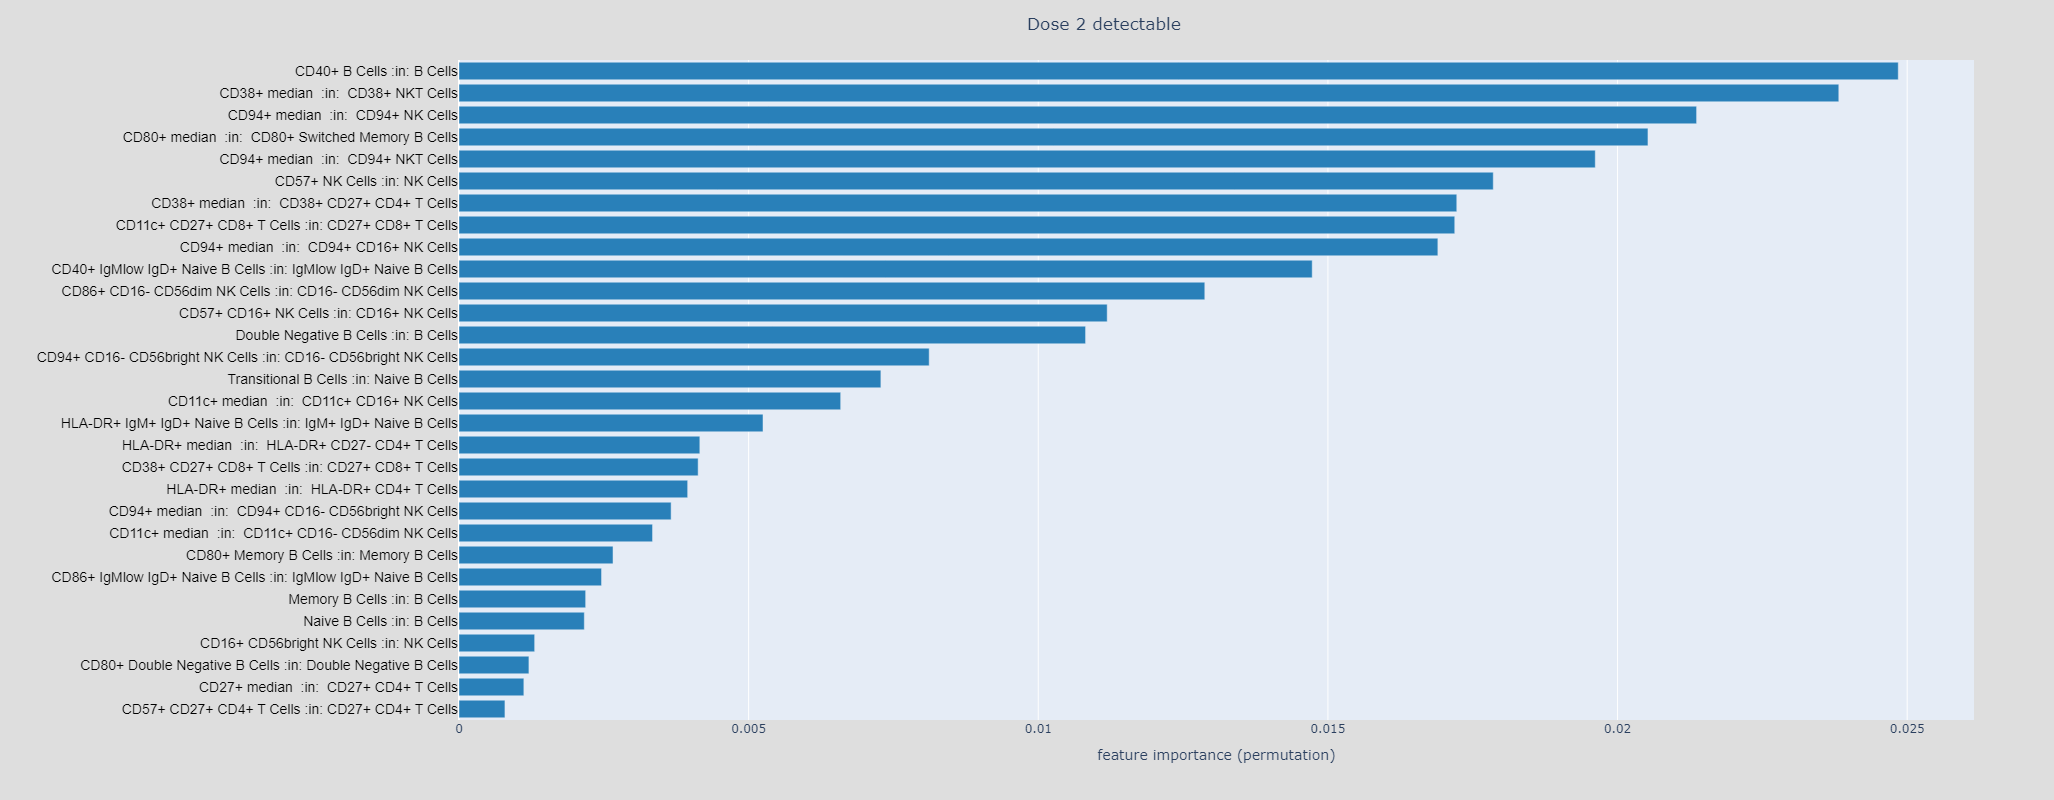

In [33]:
df = data["SVM_RFE_d2_d"]["df"]
df = df.loc[df["var"]!="age",:]
df = df.sort_values(by="impor_mean",ascending=False)
fig1 = px.bar(df.iloc[:30,:], x="impor_mean", y="var",orientation='h',labels={"impor_mean": "feature importance (permutation)","var": ""})
fig1.update_layout(showlegend=False,height = 800,yaxis={'categoryorder':'total ascending'},width = 1000,title = "Dose 2 detectable")
fig1.layout.title.xanchor = 'left'
fig1.layout.title.x = 0.5
fig1.update_traces(marker_color='rgba(41, 128, 185, 1.0)')
fig1.layout.yaxis.tickfont = dict(size =14, color='black', family='Arial, sans-serif')
fig1.layout.paper_bgcolor = 'rgb(222,222,222)'
fig1.update(layout_coloraxis_showscale=False)
#fig1.update_yaxes(ticklabelposition="inside top", title=None)
fig1.write_image("fig_ml_A.svg")
fig1

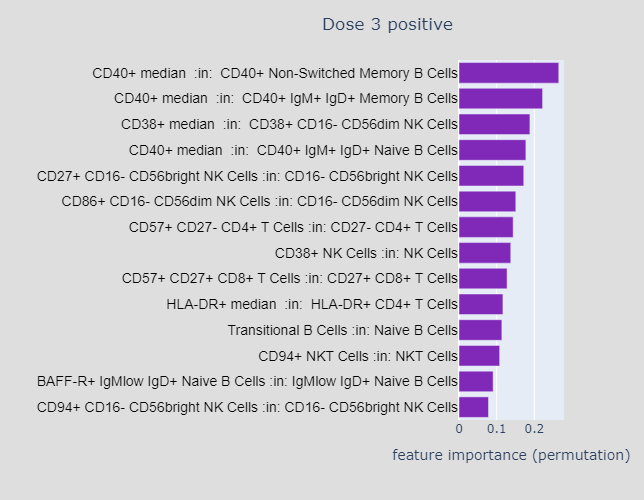

In [34]:
df = data["SVM_RFE_d3_p"]["df"]
df = df.loc[df["var"]!="age",:]
df = df.loc[df["var"]!="tx_time",:]
df = df.loc[df["var"]!="type",:]
df = df.sort_values(by="impor_mean",ascending=False)
fig1 = px.bar(df.iloc[:40,:], x="impor_mean", y="var",orientation='h',labels={"impor_mean": "feature importance (permutation)","var": ""})
fig1.update_layout(showlegend=False,height = 500,yaxis={'categoryorder':'total ascending'},width = 1000,title = "Dose 3 positive")
fig1.layout.title.xanchor = 'left'
fig1.layout.title.x = 0.5
fig1.update_traces(marker_color='rgba( 128,41, 185, 1.0)')
fig1.layout.yaxis.tickfont = dict(size =14, color='black', family='Arial, sans-serif')
fig1.layout.paper_bgcolor = 'rgb(222,222,222)'
fig1.update(layout_coloraxis_showscale=False)
#fig1.update_yaxes(ticklabelposition="inside top", title=None)
fig1.write_image("fig_ml_B.svg")
fig1

### ROC ML

In [27]:
fold = os.getcwd()
file = open(fold + "/data_aux/feature_eval.pkl","rb")
data = pk.load(file)
file.close()

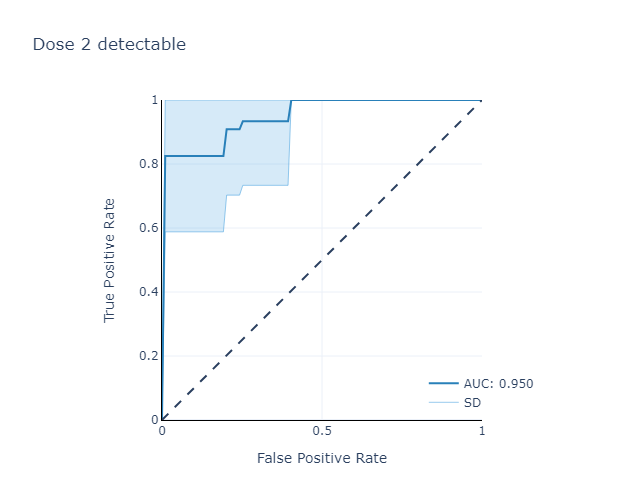

In [28]:
y_true_d2_d  = []
y_true_d3_p  = []
y_score_d2_d = []
y_score_d3_p = []
for i in range(len(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"])):
    y_true_d2_d.append(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"][i]["y_true"])
    y_true_d3_p.append(data["comp"]["SVM_RFE_d3_p"]["SVM_d3_p"][i]["y_true"])
    y_score_d2_d.append(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"][i]["z"])
    y_score_d3_p.append(data["comp"]["SVM_RFE_d3_p"]["SVM_d3_p"][i]["z"])


kind = 'val'
c_line      = 'rgba(52, 152, 219, 0.5)'
c_fill      = 'rgba(52, 152, 219, 0.2)'
c_line_main = 'rgba(41, 128, 185, 1.0)'
c_grid      = 'rgba(189, 195, 199, 0.5)'
#c_annot     = 'rgba(149, 165, 166, 0.5)'
#c_highlight = 'rgba(192, 57, 43, 1.0)'
fpr_mean    = np.linspace(0, 1, 100)
interp_tprs_d2_d = []
interp_tprs_d3_p = []
for i in range(len(y_true_d2_d)):
    fpr_d2_d, tpr_d2_d, thresholds = roc_curve(y_true_d2_d[i], y_score_d2_d[i])
    fpr_d3_p, tpr_d3_p, thresholds = roc_curve(y_true_d3_p[i], y_score_d3_p[i])
    interp_tpr_d2_d    = np.interp(fpr_mean, fpr_d2_d, tpr_d2_d)
    interp_tpr_d3_p    = np.interp(fpr_mean, fpr_d3_p, tpr_d3_p)
    interp_tpr_d2_d[0] = 0.0
    interp_tpr_d3_p[0] = 0.0
    interp_tprs_d2_d.append(interp_tpr_d2_d)
    interp_tprs_d3_p.append(interp_tpr_d3_p)
tpr_mean_d2_d     = np.mean(interp_tprs_d2_d, axis=0)
tpr_mean_d3_p     = np.mean(interp_tprs_d3_p, axis=0)
tpr_mean_d2_d[-1] = 1.0
tpr_mean_d3_p[-1] = 1.0
tpr_std_d2_d      = np.std(interp_tprs_d2_d, axis=0)
tpr_std_d3_p      = np.std(interp_tprs_d3_p, axis=0)
tpr_upper_d2_d    = np.clip(tpr_mean_d2_d+tpr_std_d2_d, 0, 1)
tpr_upper_d3_p    = np.clip(tpr_mean_d3_p+tpr_std_d3_p, 0, 1)
tpr_lower_d2_d    = tpr_mean_d2_d-tpr_std_d2_d
tpr_lower_d3_p    = tpr_mean_d3_p-tpr_std_d3_p

fig3 = go.Figure([
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_upper_d2_d,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'SD'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_lower_d2_d,
        fill       = 'tonexty',
        fillcolor  = c_fill,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = False,
        name       = 'lower'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_mean_d2_d,
        line       = dict(color=c_line_main, width=2),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'AUC: 0.950')
]
)
fig3.add_shape(
    type ='line', 
    line =dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig3.update_layout(
    template    = 'plotly_white', 
    title_x     = 0.5,
    title = "Dose 2 detectable",
    xaxis_title = "False Positive Rate",
    yaxis_title = "True Positive Rate",
    width       = 500,
    height      = 500,
    legend      = dict(
        yanchor="bottom", 
        xanchor="right", 
        x=0.95,
        y=0.01,
    )
)
fig3.update_yaxes(
    range       = [0, 1],
    scaleanchor = "x", 
    scaleratio  = 1,
    linecolor   = 'black')
fig3.update_xaxes(
    range       = [0, 1],
    constrain   = 'domain',
    linecolor   = 'black')
fig3.write_image("fig_ml_C.svg")
fig3

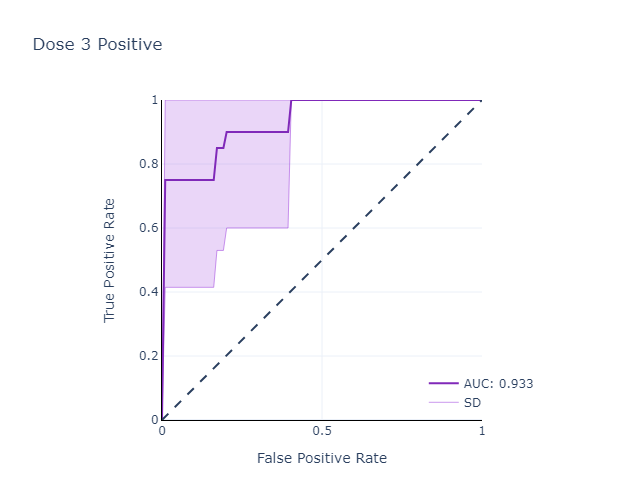

In [29]:
c_line      = 'rgba( 152,52, 219, 0.5)'
c_fill      = 'rgba( 152,52, 219, 0.2)'
c_line_main = 'rgba( 128,41, 185, 1.0)'
c_grid      = 'rgba( 195,189, 199, 0.5)'

fig4 = go.Figure([
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_upper_d3_p,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'SD'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_lower_d3_p,
        fill       = 'tonexty',
        fillcolor  = c_fill,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = False,
        name       = 'lower'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_mean_d3_p,
        line       = dict(color=c_line_main, width=2),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'AUC: 0.933')
]
)
fig4.add_shape(
    type ='line', 
    line =dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig4.update_layout(
    template    = 'plotly_white', 
    title_x     = 0.5,
    title = "Dose 3 Positive",
    xaxis_title = "False Positive Rate",
    yaxis_title = "True Positive Rate",
    width       = 500,
    height      = 500,
    legend      = dict(
        yanchor="bottom", 
        xanchor="right", 
        x=0.95,
        y=0.01,
    )
)
fig4.update_yaxes(
    range       = [0, 1],
    scaleanchor = "x", 
    scaleratio  = 1,
    linecolor   = 'black')
fig4.update_xaxes(
    range       = [0, 1],
    constrain   = 'domain',
    linecolor   = 'black')
fig4.write_image("fig_ml_D.svg")
fig4

In [30]:
df =data["data"]['[SVM_RFE]']
df.to_csv(fold + "/res/table.csv",index=False)
